In [99]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [100]:
# loading our dataframes

df_m = pd.read_csv('../data/student-mat.csv', delimiter=';')
df_p = pd.read_csv('../data/student-por.csv', delimiter=';')

In [101]:
#frames = [df_m, df_p]
#df = pd.concat 9frames)


In [102]:
df_m.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [103]:
df_p.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [104]:
df_p.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


<Axes: xlabel='goout', ylabel='Count'>

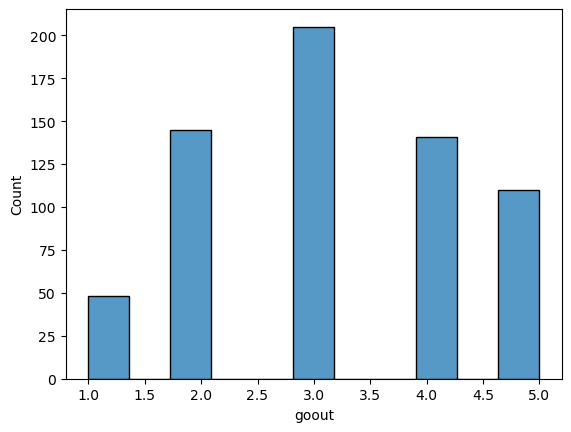

In [105]:
sns.histplot(data=df_p, x= 'goout')

<Axes: xlabel='freetime', ylabel='Count'>

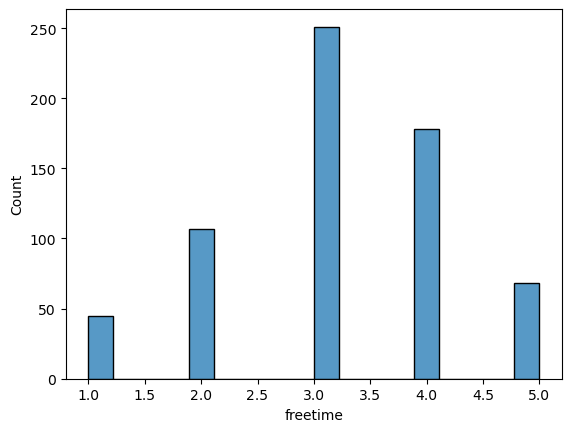

In [106]:
sns.histplot(data=df_p, x ='freetime')

<Axes: xlabel='studytime', ylabel='Count'>

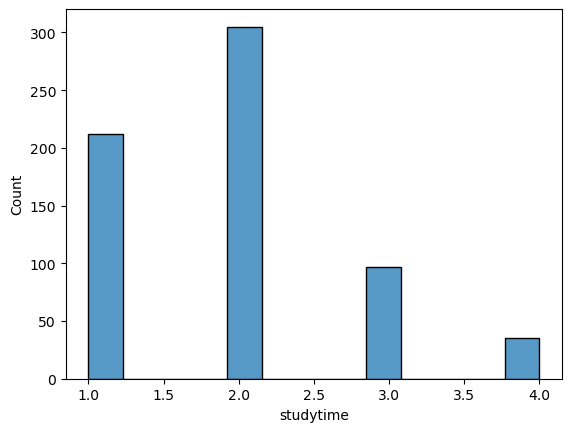

In [107]:
sns.histplot(data=df_p, x ='studytime')

<Axes: xlabel='studytime', ylabel='Count'>

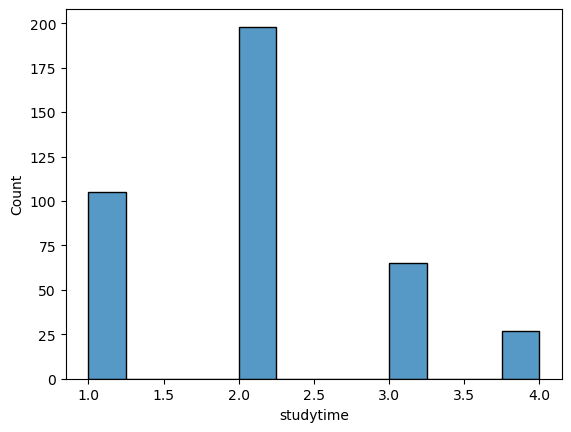

In [108]:
sns.histplot(data=df_m, x ='studytime')

<Axes: xlabel='famsize', ylabel='freetime'>

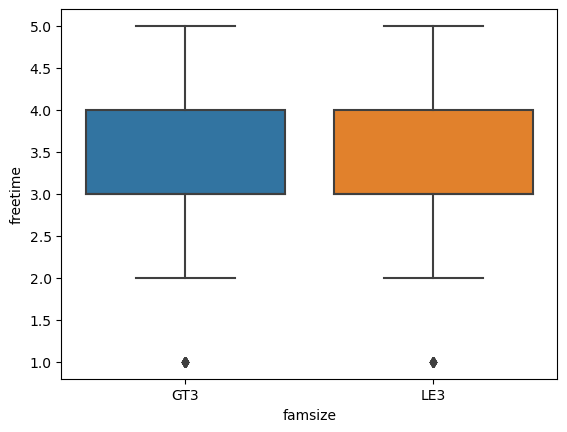

In [109]:
sns.boxplot(data=df_p, y= 'freetime', x ='famsize')

<Axes: xlabel='G1'>

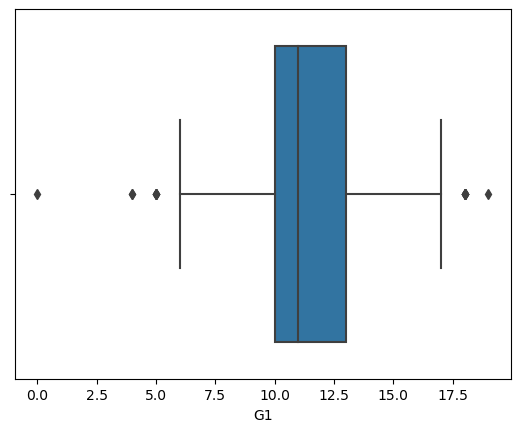

In [110]:
sns.boxplot(data=df_p, hue= 'freetime', x ='G1')

<Axes: xlabel='G3', ylabel='studytime'>

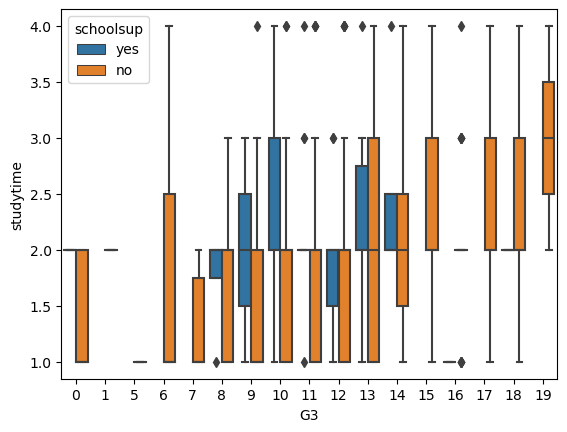

In [111]:
sns.boxplot(data=df_p, hue= 'schoolsup', x ='G3', y = 'studytime')

In [112]:
pd.set_option('display.max_columns', None)

df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

<Axes: xlabel='G2', ylabel='freetime'>

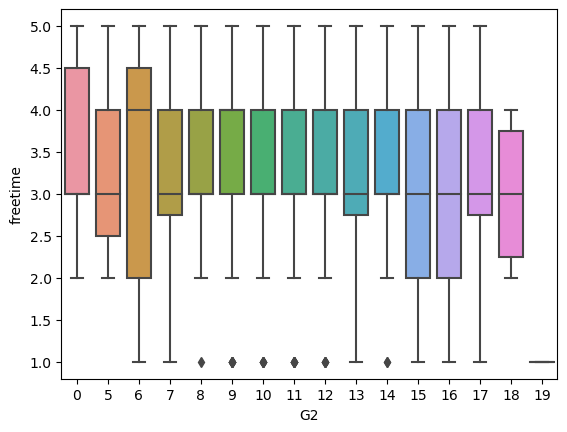

In [113]:
sns.boxplot(data=df_p, y= 'freetime', x ='G2')

<Axes: xlabel='G3', ylabel='freetime'>

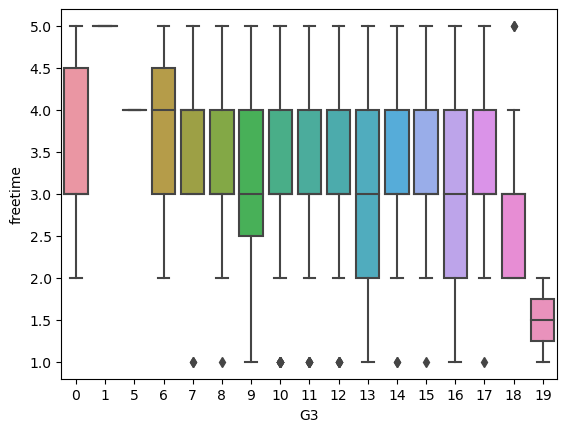

In [114]:
sns.boxplot(data=df_p, y= 'freetime', x ='G3')

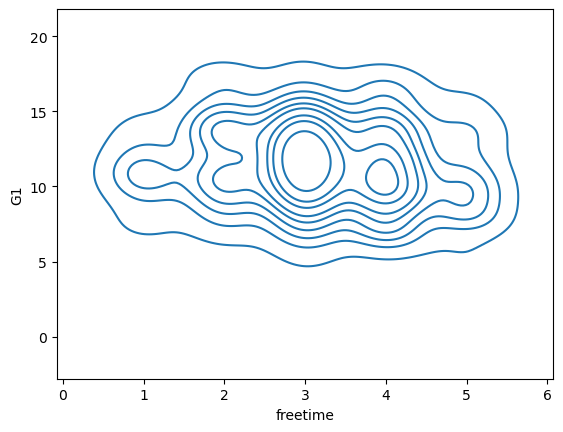

In [115]:
sns.kdeplot(data=df_p, x=df_p["freetime"], y=df_p["G1"])
plt.show()

In [116]:
sum_grades_p = df_p['G1'] + df_p['G2'] + df_p['G3']

<Axes: ylabel='goout'>

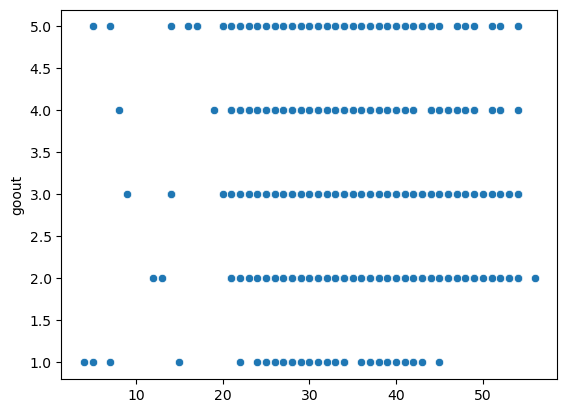

In [117]:
sns.scatterplot (data=df_m, x=sum_grades_p, y=df_p["goout"])

<Axes: xlabel='studytime', ylabel='G1'>

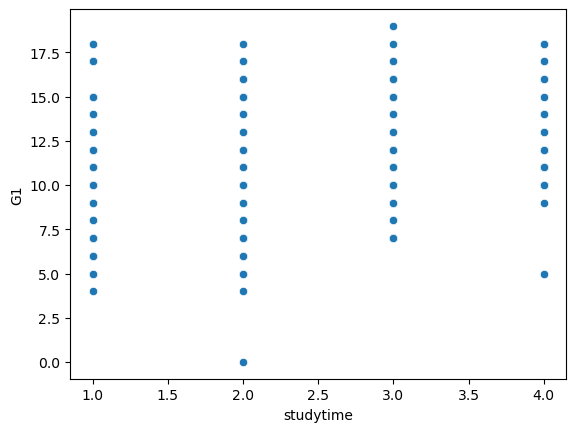

In [118]:
sns.scatterplot (data=df_p, x=df_p["studytime"], y=df_p["G1"])


<Axes: ylabel='absences'>

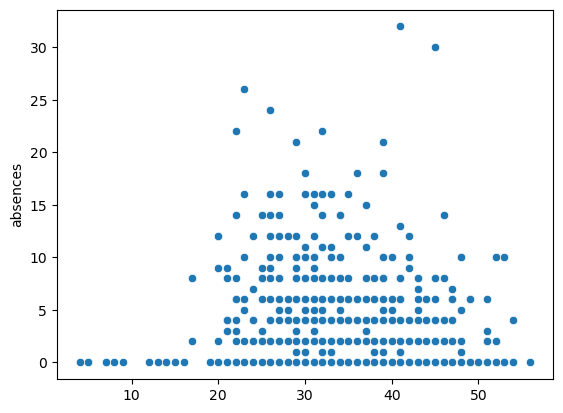

In [119]:
sns.scatterplot (data=df_m, x=sum_grades_p, y=df_p["absences"])

<Axes: xlabel='absences', ylabel='failures'>

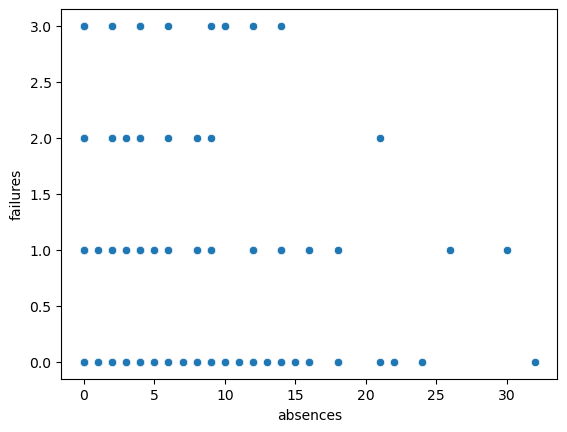

In [120]:
sns.scatterplot (data=df_m, x=df_p ["absences"], y=df_p["failures"])

<Axes: xlabel='schoolsup', ylabel='Count'>

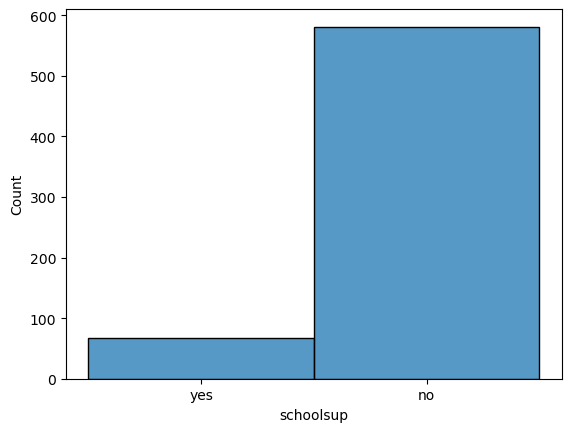

In [121]:
sns.histplot(data=df_p, x= 'schoolsup')

<Axes: xlabel='schoolsup', ylabel='Count'>

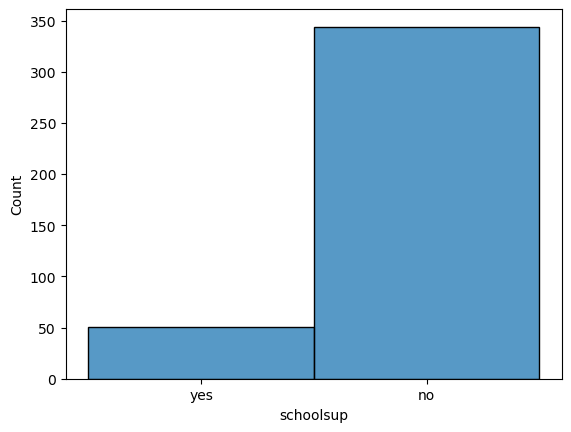

In [122]:
sns.histplot(data=df_m, x= 'schoolsup')

<Axes: xlabel='schoolsup'>

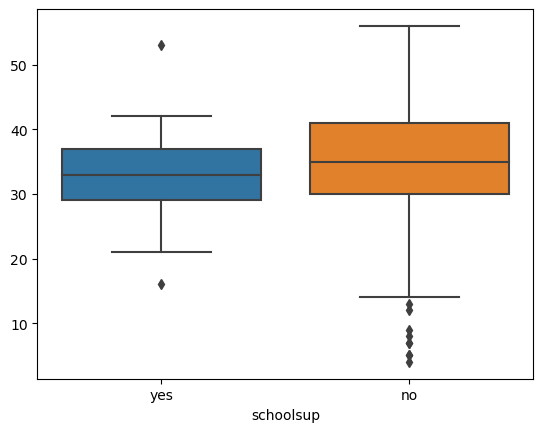

In [123]:
#this supports the notion that at least if there is school support, students will not receive less than 15 in student grades. This does not mean that having no support will mean you will get a lesser grade. 

sns.boxplot (data=df_m, x=df_p["schoolsup"], y=sum_grades_p)

<Axes: xlabel='schoolsup'>

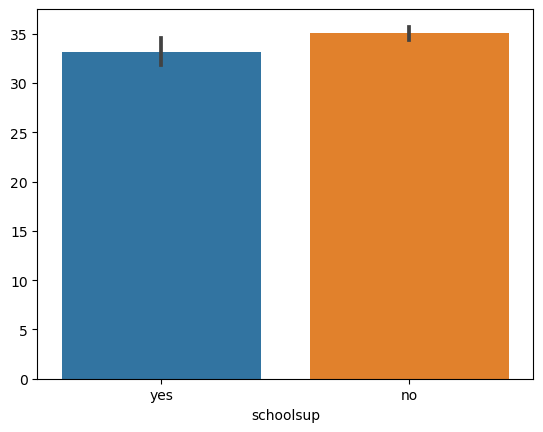

In [124]:
sns.barplot (data=df_m, x=df_p["schoolsup"], y=sum_grades_p)

<Axes: xlabel='schoolsup', ylabel='G3'>

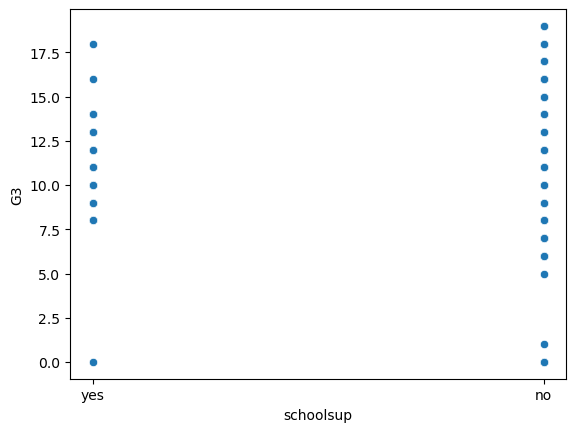

In [125]:
sns.scatterplot (data=df_p, x=df_p["schoolsup"], y=df_p['G3'])

<Axes: xlabel='schoolsup', ylabel='G3'>

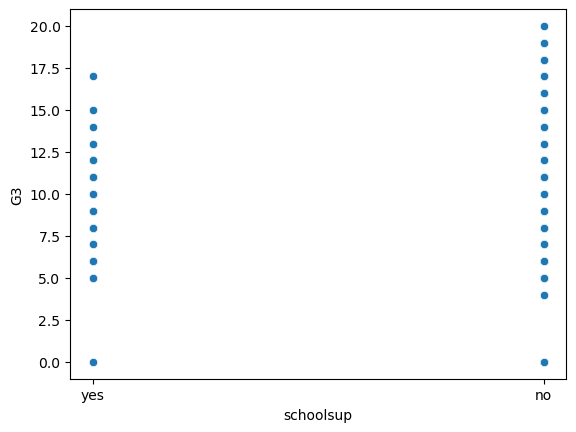

In [126]:
sns.scatterplot (data=df_m, x=df_m["schoolsup"], y=df_m['G3'])